## Reddit Webscraping with PRAW


In [426]:
import praw
from datetime import datetime as dt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import random
from credentials import credentials

## 1. Reddit Authentication

In [427]:
# Authenticating with personal Reddit account, read only mode.  Username and pswd are required for Authenticated mode
# Hiding client_id and client_secret in different python file that will be added to .gitignore

reddit = praw.Reddit(
    
    client_id=credentials.get('client_id'),
    client_secret=credentials.get('client_secret'),
    user_agent="macOS:com.example.myredditapp:v1.2.3 (by u/Oracolo)",
)

print(reddit.read_only)


True


## 2. Data Acquisition with PRAW

In [428]:
# Top 1000 titles in /all  subreddit  'Top' section

i=1
entry_list = []

# Test print to check data entry format, limit set to 1

for submission in reddit.subreddit("all").top(time_filter='year',limit=1,):
    print(i)
    print(" \"{}\" ".format(submission.title))
    print('')
    print('Author: ' + str(getattr(submission.author, 'name')))
    print('Subreddit:'+str(getattr(submission.subreddit, 'display_name')))
    print('Upvotes %:       {}'.format(submission.upvote_ratio))
    print('Post Score:      {}'.format(submission.score))
    print('N° of Comments:  {}'.format(submission.num_comments))
    print('Flair:           {}'.format(submission.link_flair_text))
    created_at = dt.fromtimestamp(submission.created_utc)
    print('Date:            {}'.format(dt.strftime(created_at, '%d/%m/%y')))
    print('Hour (GMT +2):   {}'.format(dt.strftime(created_at, '%H:%M:%S')))
    print('')
    

    
    

1
 "R/MEMES MEME QUIZ #2" 

Author: elch3w
Subreddit:memes
Upvotes %:       0.87
Post Score:      621234
N° of Comments:  4923
Flair:           None
Date:            24/12/22
Hour (GMT +2):   00:15:07



In [429]:
#Repeating previous steps and appending every entry to an empty lists as a dictionary

for submission in reddit.subreddit("all").top(time_filter='year',limit=1000,): 
    
    entry = {
             'Title': submission.title, 
             'Subreddit': getattr(submission.subreddit, 'display_name'),
             'Author': submission.author,
             'UpvotesRation':submission.upvote_ratio,
             'PostScore':submission.score,
             'NumComments': submission.num_comments,
             'Flair': submission.link_flair_text,              
             'Date' : dt.strftime(dt.fromtimestamp(submission.created_utc), '%d/%m/%y'),
             'Hour' : dt.strftime(dt.fromtimestamp(submission.created_utc), '%H:%M:%S')
        }
    entry_list.append(entry)
    i=i+1

In [430]:
entry_list[:2]

[{'Title': 'R/MEMES MEME QUIZ #2',
  'Subreddit': 'memes',
  'Author': Redditor(name='elch3w'),
  'UpvotesRation': 0.87,
  'PostScore': 621222,
  'NumComments': 4923,
  'Flair': None,
  'Date': '24/12/22',
  'Hour': '00:15:07'},
 {'Title': 'r/mildlyinfuriating predictions tournament 1 ',
  'Subreddit': 'mildlyinfuriating',
  'Author': Redditor(name='ameen__shaikh'),
  'UpvotesRation': 0.79,
  'PostScore': 541309,
  'NumComments': 1496,
  'Flair': '🔮Prediction Post🔮',
  'Date': '30/06/22',
  'Hour': '01:20:47'}]

## 3. Data Transformation & Visualization

In [431]:
# Generating dataframe containing all entries from list

data=pd.DataFrame.from_dict(entry_list)
data

,Title,Subreddit,Author,UpvotesRation,PostScore,NumComments,Flair,Date,Hour
0,R/MEMES MEME QUIZ #2,memes,elch3w,0.87,621222,4923,None,24/12/22,00:15:07
1,r/mildlyinfuriating predictions tournament 1,mildlyinfuriating,ameen__shaikh,0.79,541309,1496,🔮Prediction Post🔮,30/06/22,01:20:47
2,Full screenshot of r/place 2022,place,Wawv,0.91,342631,12528,None,05/04/22,00:59:52
3,In 1996 Ukraine handed over nuclear weapons to...,interestingasfuck,IceBuurn,0.95,339145,7725,Ukraine /r/ALL,01/03/22,17:51:15
4,he finally got his acorn 🥺,MadeMeSmile,Daldrich214,0.97,326951,3520,:snoo_hearteyes: Wholesome Moments :snoo_simpl...,14/04/22,01:37:26
...,...,...,...,...,...,...,...,...,...
973,The ancient library of Tibet. Only 5% has been...,interestingasfuck,pravinvibhute,0.95,117794,2790,/r/ALL,20/11/22,05:31:58
974,meirl,meirl,Aztery,0.76,117759,4219,None,30/09/22,22:46:16
975,Meirl,meirl,Aztery,0.95,117703,911,None,04/09/22,02:45:29
976,Coordination challenge,oddlysatisfying,solateor,0.94,117731,988,None,28/01/23,23:22:11


In [432]:
top = data[['Title','Subreddit']].groupby('Subreddit').count().sort_values('Title', ascending=False).reset_index()
top.head(25)

,Subreddit,Title
0,MadeMeSmile,176
1,nextfuckinglevel,118
2,meirl,79
3,interestingasfuck,70
4,Unexpected,61
5,funny,48
6,memes,41
7,pics,33
8,Damnthatsinteresting,33
9,aww,29


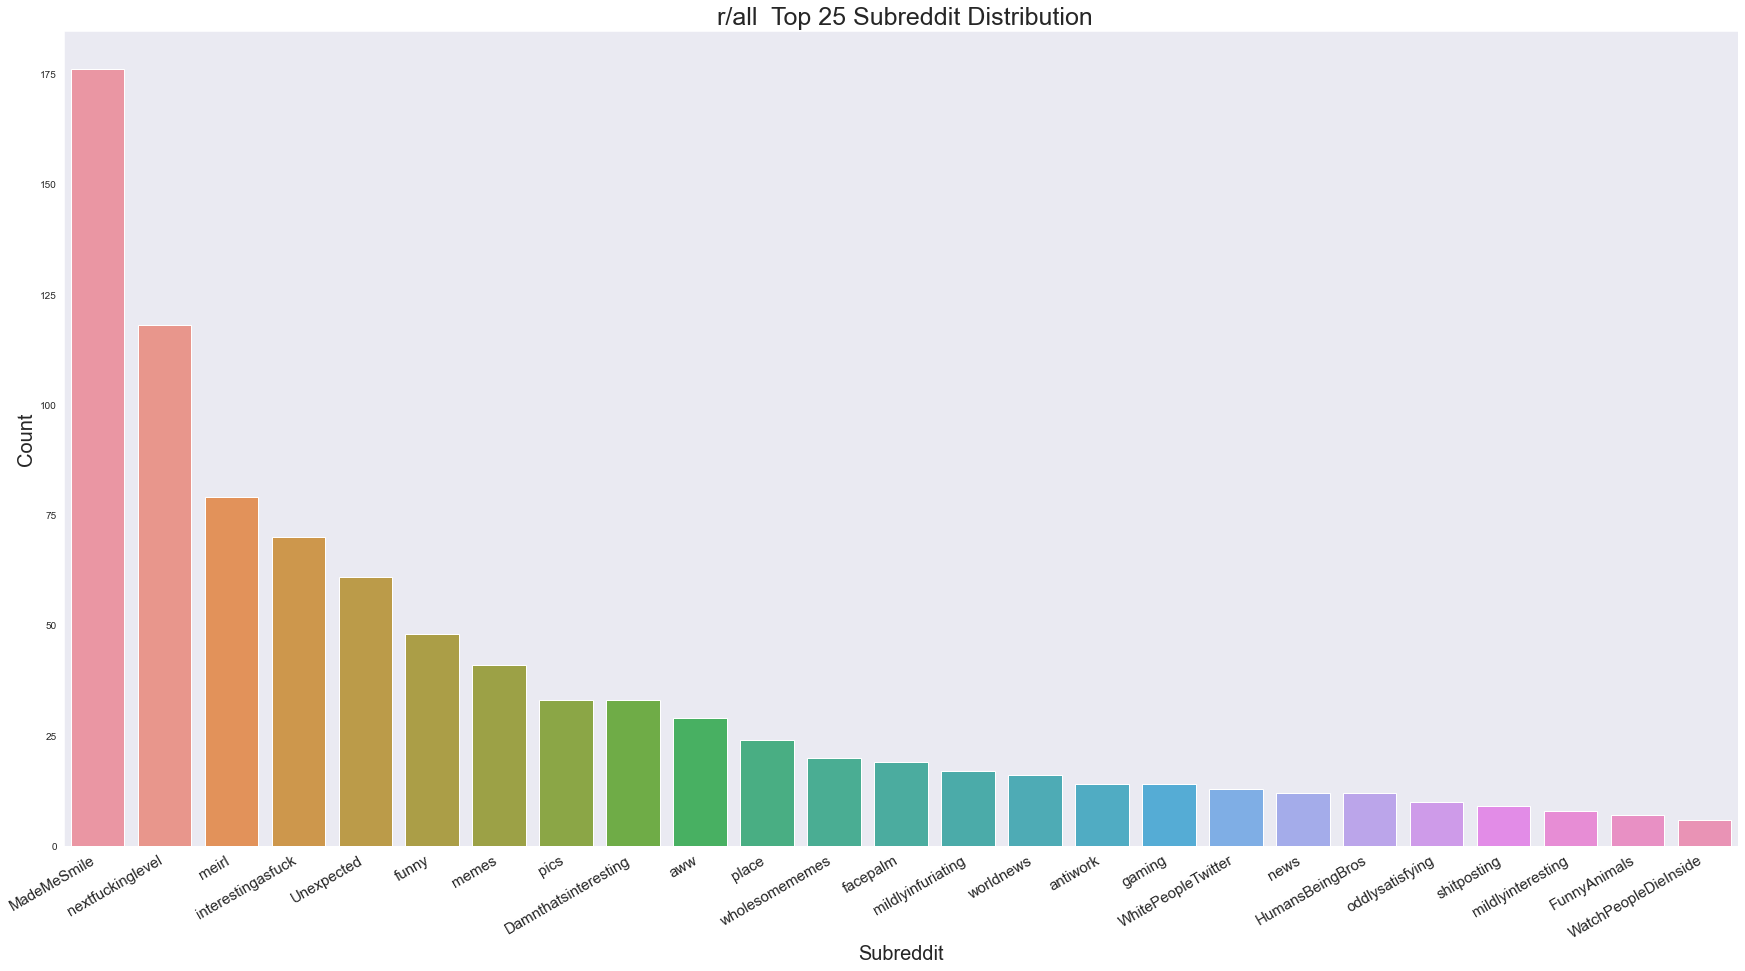

In [433]:
plt.figure(figsize=(30,15))
ax = sns.barplot(data=top.head(25),x='Subreddit', y='Title')
plt.xticks(rotation=30, horizontalalignment='right',size=15)
plt.title(' r/all  Top 25 Subreddit Distribution', size=25)
plt.xlabel('Subreddit', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

In [434]:
# Calculating overall proportions

top = top.rename(columns={'Title':'Count'})
top['Proportion'] = top['Count'].apply(lambda x: x/sum(top.Count))

# Adding a mask 'Other' for Subrettis with less than 10 toal posts
top.Subreddit=top.Subreddit.mask(top.Count < 20, other='Other')
proportions = top.groupby('Subreddit').sum().sort_values('Proportion',ascending=False)
proportions

,Count,Proportion
Subreddit,,
Other,246,0.251534
MadeMeSmile,176,0.179959
nextfuckinglevel,118,0.120654
meirl,79,0.080777
interestingasfuck,70,0.071575
Unexpected,61,0.062372
funny,48,0.049080
memes,41,0.041922
Damnthatsinteresting,33,0.033742


/var/folders/p4/rwxltnfs6qvgnnqwbq64_g4m0000gn/T/ipykernel_2306/3185138046.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(proportions.Proportion, labels=proportions.index, autopct='%.2f%%', textprops={'fontsize': 13, 'backgroundcolor':'white', 'fontweight':'bold'})


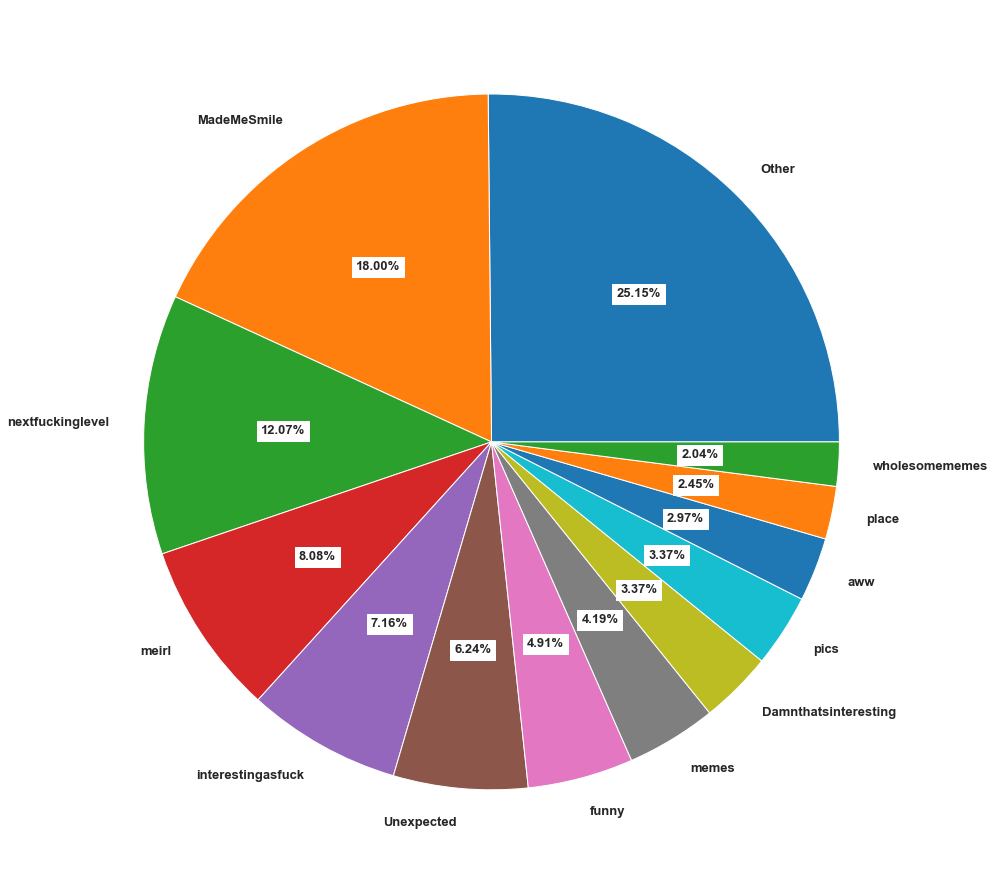

In [435]:
plt.figure(figsize=(16,16))
plt.pie(proportions.Proportion, labels=proportions.index, autopct='%.2f%%', textprops={'fontsize': 13, 'backgroundcolor':'white', 'fontweight':'bold'})
plt.show()

In [436]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center',fontsize=15, backgroundcolor='white', fontweight='bold')

In [437]:
# Obtaining Subreddits list items count 

number_of_colors = proportions.reset_index().Subreddit.count()

# Generating casual HEX colors matching lists items number with List Comprehension
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
color

['#8D5912',
 '#FDB37A',
 '#33206C',
 '#EC0B4E',
 '#A8AB6E',
 '#383B46',
 '#7CB182',
 '#6D83D0',
 '#A4CC36',
 '#E746B0',
 '#30CEE4',
 '#582838',
 '#FD7EFB']

In [438]:
# Dictionary conatining bubble chart labels, proportions and colors
bubble_chart_dict = {
    'Subs':[],
    'Count': [],
    'color': color}

bubble_chart_dict['Subs'] = proportions.index.to_list()
bubble_chart_dict['Count'] = proportions.Count.to_list()

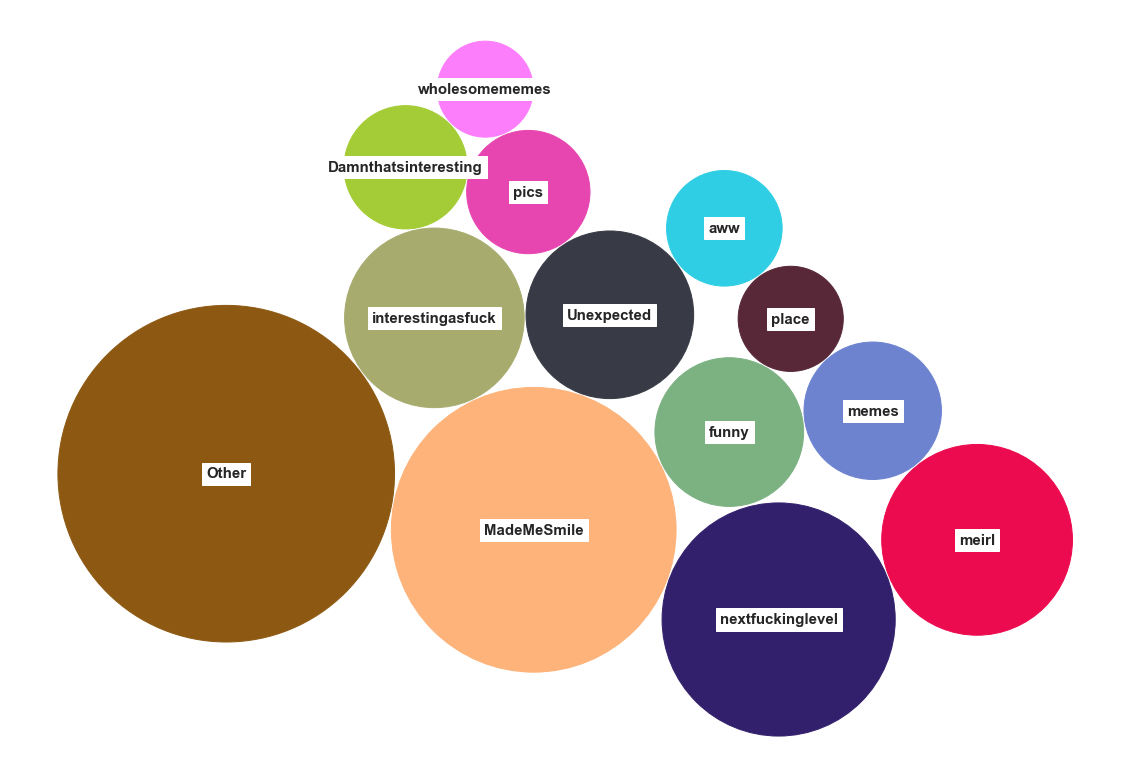

In [439]:
# Generating BubbleChart object using class defined above from matplotlib [Hidden]

bubble_chart = BubbleChart(area=proportions.Count, bubble_spacing=0.1)
bubble_chart.collapse()

# Plotting BubbleChart object 
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(20,20))
bubble_chart.plot(ax, bubble_chart_dict['Subs'], bubble_chart_dict['color'])
ax.axis("off")
ax.relim()

ax.autoscale_view()


plt.show()

In [440]:
data.Date = data.Date.astype('datetime64')
data['Month'] = data.Date.apply(lambda x: x.strftime('%m')).astype(int)
data.Hour= data.Hour.apply(lambda x: x.split(':')[0]).astype(int)
data

,Title,Subreddit,Author,UpvotesRation,PostScore,NumComments,Flair,Date,Hour,Month
0,R/MEMES MEME QUIZ #2,memes,elch3w,0.87,621222,4923,None,2022-12-24,0,12
1,r/mildlyinfuriating predictions tournament 1,mildlyinfuriating,ameen__shaikh,0.79,541309,1496,🔮Prediction Post🔮,2022-06-30,1,6
2,Full screenshot of r/place 2022,place,Wawv,0.91,342631,12528,None,2022-05-04,0,5
3,In 1996 Ukraine handed over nuclear weapons to...,interestingasfuck,IceBuurn,0.95,339145,7725,Ukraine /r/ALL,2022-01-03,17,1
4,he finally got his acorn 🥺,MadeMeSmile,Daldrich214,0.97,326951,3520,:snoo_hearteyes: Wholesome Moments :snoo_simpl...,2022-04-14,1,4
...,...,...,...,...,...,...,...,...,...,...
973,The ancient library of Tibet. Only 5% has been...,interestingasfuck,pravinvibhute,0.95,117794,2790,/r/ALL,2022-11-20,5,11
974,meirl,meirl,Aztery,0.76,117759,4219,None,2022-09-30,22,9
975,Meirl,meirl,Aztery,0.95,117703,911,None,2022-04-09,2,4
976,Coordination challenge,oddlysatisfying,solateor,0.94,117731,988,None,2023-01-28,23,1


In [441]:
data.dtypes

Title                    object
Subreddit                object
Author                   object
UpvotesRation           float64
PostScore                 int64
NumComments               int64
Flair                    object
Date             datetime64[ns]
Hour                      int64
Month                     int64
dtype: object

In [442]:
grouped=data[['Title','Month','Subreddit']].groupby(['Month','Subreddit']).count().sort_values(['Month','Subreddit']).reset_index()
grouped.Month = grouped.Month.astype(int)
grouped

,Month,Subreddit,Title
0,1,AnimalsBeingBros,1
1,1,Damnthatsinteresting,1
2,1,FunnyAnimals,1
3,1,HumansBeingBros,2
4,1,MadeMeSmile,11
...,...,...,...
306,12,nextfuckinglevel,3
307,12,pics,8
308,12,space,1
309,12,therewasanattempt,1


In [443]:
min_posts= 3

# N of Unique Subs with less than min posts
len(grouped[grouped.Title < min_posts].Subreddit.unique())

72

In [444]:
# N of Posts from Subs with less than min posts
grouped[grouped.Title < min_posts].Title.sum()

261

In [445]:
# Dropping rows with Subs accounting less than min
grouped.drop(grouped.Title[grouped.Title < min_posts].index, inplace=True)

In [446]:
# N of Unique Subs after drop
len(grouped.Subreddit.unique())

21

In [447]:
# N of Posts from Subs after drop
grouped.Title.sum()

717

In [448]:
grouped

,Month,Subreddit,Title
4,1,MadeMeSmile,11
9,1,aww,3
11,1,funny,7
12,1,interestingasfuck,5
13,1,meirl,4
...,...,...,...
296,12,Unexpected,4
300,12,funny,6
303,12,meirl,9
306,12,nextfuckinglevel,3


In [449]:
# Creating pivot table with columns for each Sub and rows for each month

pivot = grouped.pivot(index='Month', columns='Subreddit', values='Title')
pivot = pivot.reset_index().fillna(0)
pivot

Subreddit,Month,Damnthatsinteresting,FunnyAnimals,HumansBeingBros,MadeMeSmile,Unexpected,antiwork,aww,facepalm,funny,...,meirl,memes,mildlyinfuriating,news,nextfuckinglevel,pics,place,technology,wholesomememes,worldnews
0,1,0.0,0.0,0.0,11.0,0.0,0.0,3.0,0.0,7.0,...,4.0,0.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0
1,2,10.0,0.0,0.0,21.0,4.0,0.0,3.0,3.0,5.0,...,0.0,8.0,0.0,0.0,19.0,4.0,0.0,3.0,0.0,10.0
2,3,4.0,0.0,0.0,17.0,8.0,0.0,5.0,0.0,0.0,...,3.0,3.0,0.0,0.0,11.0,0.0,3.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,20.0,4.0,3.0,0.0,4.0,5.0,...,7.0,6.0,3.0,0.0,11.0,3.0,7.0,0.0,0.0,0.0
4,5,4.0,0.0,0.0,24.0,13.0,0.0,3.0,3.0,7.0,...,11.0,11.0,0.0,0.0,15.0,0.0,10.0,0.0,3.0,0.0
5,6,0.0,3.0,0.0,12.0,9.0,0.0,0.0,0.0,3.0,...,7.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
6,7,3.0,0.0,0.0,16.0,6.0,0.0,0.0,0.0,3.0,...,8.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,3.0,15.0,0.0,3.0,0.0,0.0,0.0,...,6.0,4.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,13.0,3.0,0.0,3.0,0.0,3.0,...,8.0,0.0,0.0,3.0,11.0,3.0,0.0,0.0,3.0,0.0
9,10,3.0,0.0,0.0,10.0,4.0,0.0,0.0,3.0,5.0,...,4.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,0.0


In [450]:
# Extracting posts number to insert in chart title
num_of_posts = pivot.drop(columns='Month').sum().sum().astype(int)

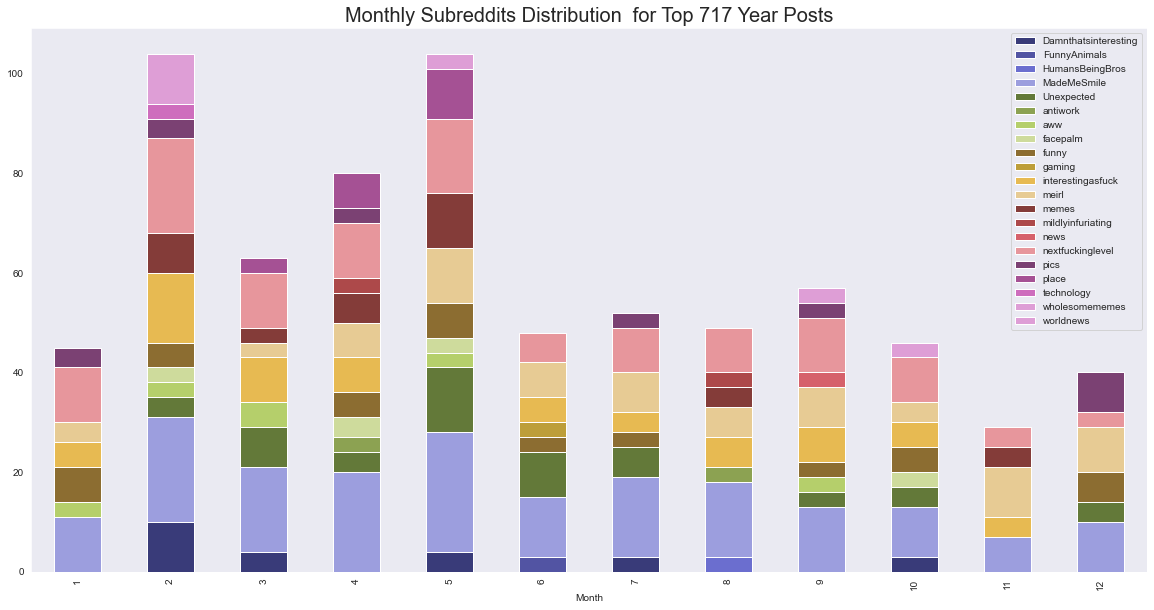

In [451]:
plt.rcParams["figure.figsize"] = (20,10)

# Stacked Bar Chart  WHOLE YEAR
pivot.plot(kind='bar', stacked=True, x='Month',colormap='tab20b')
plt.title('Monthly Subreddits Distribution  for Top {} Year Posts'.format(num_of_posts),size=20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [452]:
# # Stacked Bar Chart  ~. DESIRED RANGE  January - June

months = range(1,7)
grouped_months = grouped[grouped.Month.isin(months) == True]
grouped_months.groupby(['Month','Subreddit']).sum().reset_index()

,Month,Subreddit,Title
0,1,MadeMeSmile,11
1,1,aww,3
2,1,funny,7
3,1,interestingasfuck,5
4,1,meirl,4
5,1,nextfuckinglevel,11
6,1,pics,4
7,2,Damnthatsinteresting,10
8,2,MadeMeSmile,21
9,2,Unexpected,4


In [453]:
pivot_months = grouped_months.pivot(index='Month', columns='Subreddit', values='Title')
pivot_months = pivot_months.reset_index().fillna(0)
pivot_months

Subreddit,Month,Damnthatsinteresting,FunnyAnimals,MadeMeSmile,Unexpected,antiwork,aww,facepalm,funny,gaming,interestingasfuck,meirl,memes,mildlyinfuriating,nextfuckinglevel,pics,place,technology,wholesomememes,worldnews
0,1,0.0,0.0,11.0,0.0,0.0,3.0,0.0,7.0,0.0,5.0,4.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0
1,2,10.0,0.0,21.0,4.0,0.0,3.0,3.0,5.0,0.0,14.0,0.0,8.0,0.0,19.0,4.0,0.0,3.0,0.0,10.0
2,3,4.0,0.0,17.0,8.0,0.0,5.0,0.0,0.0,0.0,9.0,3.0,3.0,0.0,11.0,0.0,3.0,0.0,0.0,0.0
3,4,0.0,0.0,20.0,4.0,3.0,0.0,4.0,5.0,0.0,7.0,7.0,6.0,3.0,11.0,3.0,7.0,0.0,0.0,0.0
4,5,4.0,0.0,24.0,13.0,0.0,3.0,3.0,7.0,0.0,0.0,11.0,11.0,0.0,15.0,0.0,10.0,0.0,3.0,0.0
5,6,0.0,3.0,12.0,9.0,0.0,0.0,0.0,3.0,3.0,5.0,7.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [454]:
num_of_posts_months = pivot_months.drop(columns='Month').sum().sum().astype(int)

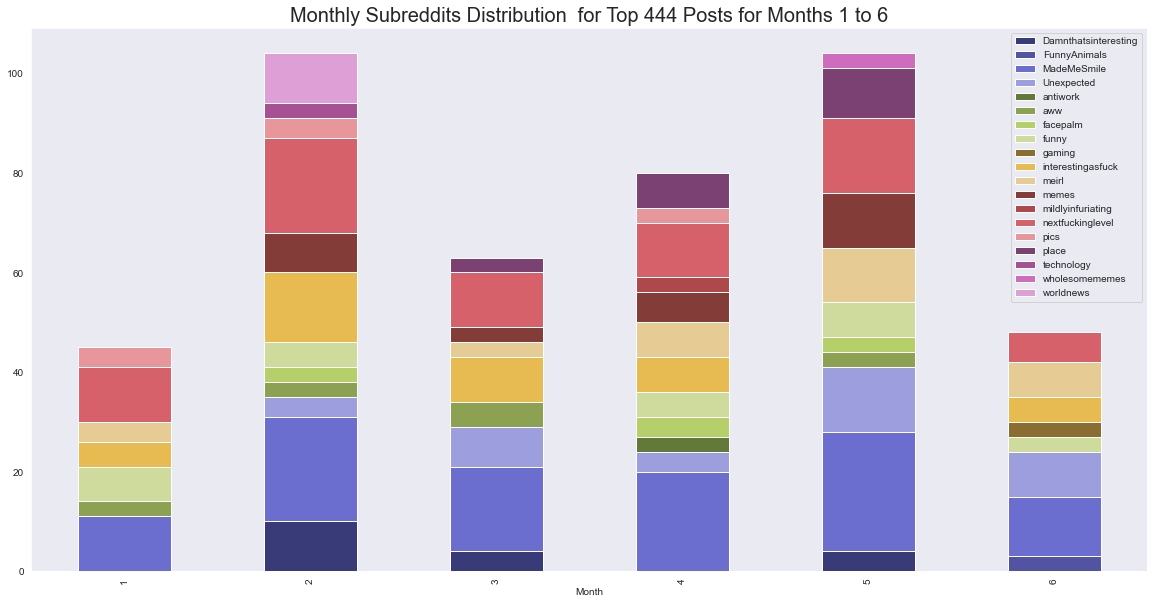

In [455]:
plt.rcParams["figure.figsize"] = (20,10)
pivot_months.plot(kind='bar', stacked=True, x='Month',colormap='tab20b')
plt.title('Monthly Subreddits Distribution  for Top {} Posts for Months {} to {}'.format(num_of_posts_months,months[0],months[-1]),size=20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [456]:
grouped_h=data[['Title','Hour','Subreddit']].groupby(['Hour','Subreddit']).count().sort_values(['Hour','Subreddit']).reset_index()

grouped_h

,Hour,Subreddit,Title
0,0,FunnyAnimals,1
1,0,HumansBeingBros,2
2,0,MadeMeSmile,9
3,0,Unexpected,1
4,0,antiwork,1
...,...,...,...
418,23,nextfuckinglevel,5
419,23,oddlysatisfying,1
420,23,perfectlycutscreams,1
421,23,pics,3


In [457]:
# Dropping rows with Subs accounting less than 2
grouped_h.drop(grouped_h.Title[grouped_h.Title < min_posts].index, inplace=True)

In [458]:
pivot_h = grouped_h.pivot(index='Hour', columns='Subreddit', values='Title')
pivot_h = pivot_h.reset_index().fillna(0)
pivot_h

Subreddit,Hour,Damnthatsinteresting,HumansBeingBros,MadeMeSmile,Unexpected,WhitePeopleTwitter,aww,facepalm,funny,gaming,interestingasfuck,meirl,memes,mildlyinfuriating,nextfuckinglevel,pics,place,wholesomememes
0,0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0
1,1,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,7.0,0.0,0.0,0.0
2,2,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,3,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0
4,4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0
5,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
7,9,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0
8,10,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
9,11,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0


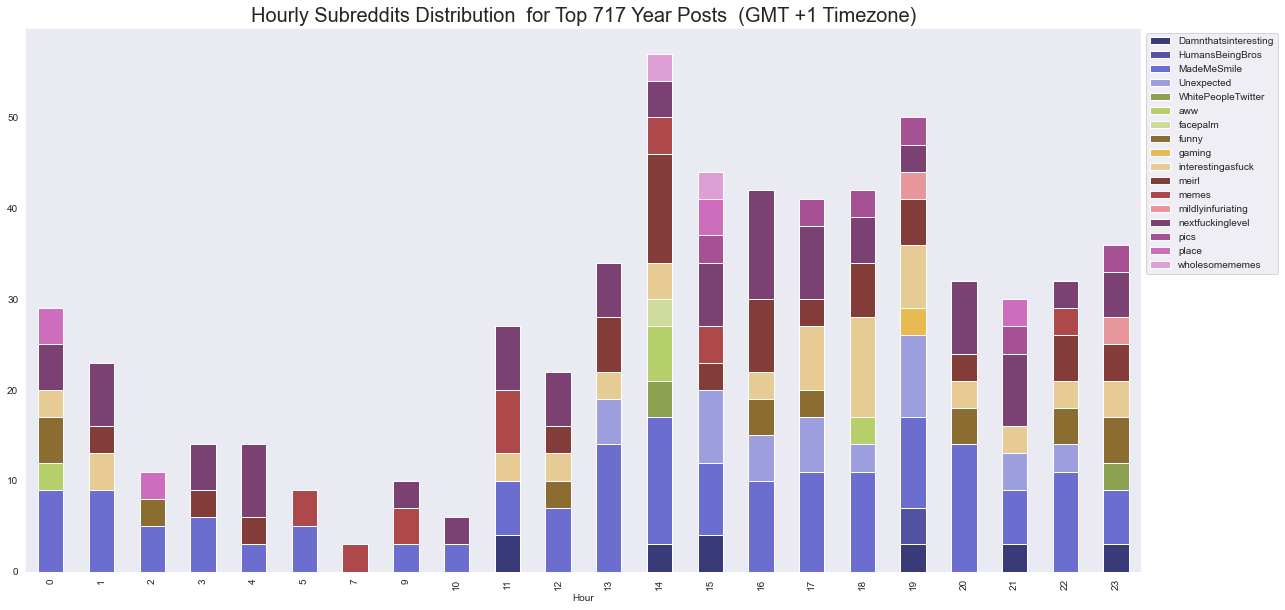

In [459]:
plt.rcParams["figure.figsize"] = (20,10)

# Stacked Bar Chart ~ HOURLY Distribution

pivot_h.plot(kind='bar', stacked=True, x='Hour',colormap='tab20b')
plt.title('Hourly Subreddits Distribution  for Top {} Year Posts  (GMT +1 Timezone)'.format(num_of_posts),size=20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [460]:
top_authors =  data.Author.value_counts().nlargest(15).reset_index().rename(columns={'index':'Redditor', 'Author':'Count'})
top_authors

,Redditor,Count
0,SnooCupcakes8607,13
1,Aztery,11
2,Swerwin,8
3,TwasAnChild,6
4,GroundbreakingSet187,6
5,PeasKhichra,6
6,waqasnaseem07,5
7,esberat,5
8,Morgentau7,5
9,solateor,5


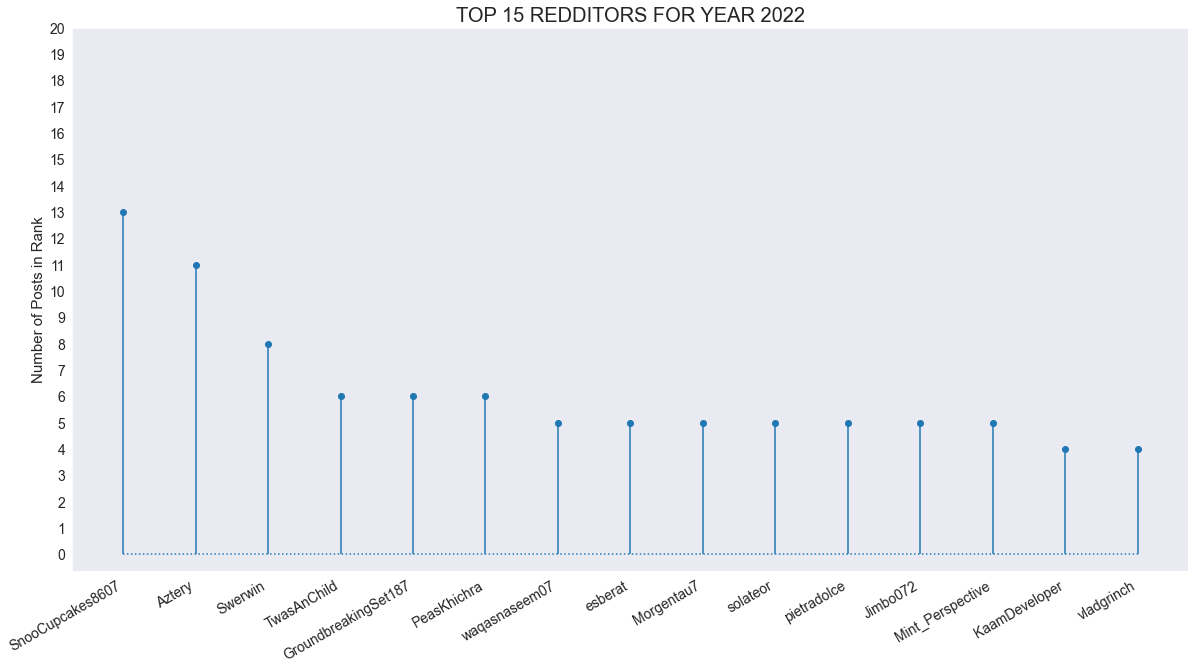

In [469]:
sns.set_style('dark')
plt.stem(range(2,17),top_authors.Count, basefmt=':')
plt.yticks(range(21), fontsize=14)
plt.xticks(range(2,17), labels=top_authors.Redditor,rotation=30, fontsize=14, horizontalalignment='right')
plt.title('TOP {len_top_authors} REDDITORS FOR YEAR 2022'.format(len_top_authors=len(top_authors)),size=20)
plt.ylabel('Number of Posts in Rank', size=15)
plt.show()

In [492]:
# Author names are stored as Redditor() class object, we need to extract the name as str

def extract_name(dataframe, Redditor_obj):
    try:
        name = vars(Redditor_obj)['name']
     
    except TypeError:
        print(Redditor_obj)
        print('ERROR')
        pass
    return str(name)

extract_name(data, data.Author[0])

'elch3w'

In [470]:
# Some items has None as Author, we need to identify their index and drop them, list will empty after 1st execution

to_drop

[77,
 115,
 165,
 187,
 204,
 233,
 264,
 281,
 298,
 333,
 371,
 427,
 488,
 493,
 515,
 524,
 683,
 694,
 725,
 737,
 813,
 834,
 855,
 858,
 928,
 938,
 943]

In [473]:
data = data.drop(to_drop).reset_index(drop=True)

In [478]:
# len of loops
len_dataframe = range(len(data))

# String names extracted
author_list=[]

# Some items has None as Author, we need to identify their index and drop them, initalize empty list to contain them
to_drop = []
i = 0
for i in len_dataframe:
    try:
        string = extract_name(data, data.Author[i])
        author_list.append(string)
    except UnboundLocalError:
        print(i)
        to_drop.append(i)
    i+=1

    
data['Redditor'] = author_list

In [481]:
# Moving column 

# column_to_move = data.pop('Redditor')
# data.insert(2, "Redditor", column_to_move)

In [482]:
data

,Title,Subreddit,Redditor,Author,UpvotesRation,PostScore,NumComments,Flair,Date,Hour,Month
0,R/MEMES MEME QUIZ #2,memes,elch3w,elch3w,0.87,621222,4923,None,2022-12-24,0,12
1,r/mildlyinfuriating predictions tournament 1,mildlyinfuriating,ameen__shaikh,ameen__shaikh,0.79,541309,1496,🔮Prediction Post🔮,2022-06-30,1,6
2,Full screenshot of r/place 2022,place,Wawv,Wawv,0.91,342631,12528,None,2022-05-04,0,5
3,In 1996 Ukraine handed over nuclear weapons to...,interestingasfuck,IceBuurn,IceBuurn,0.95,339145,7725,Ukraine /r/ALL,2022-01-03,17,1
4,he finally got his acorn 🥺,MadeMeSmile,Daldrich214,Daldrich214,0.97,326951,3520,:snoo_hearteyes: Wholesome Moments :snoo_simpl...,2022-04-14,1,4
...,...,...,...,...,...,...,...,...,...,...,...
946,The ancient library of Tibet. Only 5% has been...,interestingasfuck,pravinvibhute,pravinvibhute,0.95,117794,2790,/r/ALL,2022-11-20,5,11
947,meirl,meirl,Aztery,Aztery,0.76,117759,4219,None,2022-09-30,22,9
948,Meirl,meirl,Aztery,Aztery,0.95,117703,911,None,2022-04-09,2,4
949,Coordination challenge,oddlysatisfying,solateor,solateor,0.94,117731,988,None,2023-01-28,23,1


In [483]:
score_aggr = data[['Redditor','PostScore','Title','NumComments']].groupby('Redditor').agg({'PostScore':'sum','Title':'count', 'NumComments':'sum'})
score_aggr['ScoreAvg'] = round(score_aggr.PostScore / score_aggr.Title, 0)
score_aggr['CommentsAvg'] = round(score_aggr.NumComments / score_aggr.Title, 0)
score_aggr

,PostScore,Title,NumComments,ScoreAvg,CommentsAvg
Redditor,,,,,
--dany--,119359,1,4990,119359.0,4990.0
-Rookie-Mistake-,130598,1,7795,130598.0,7795.0
-TripleABattery-,215626,1,2792,215626.0,2792.0
-Zepphyrrez-,442416,2,5575,221208.0,2788.0
-catsnlacquer-,125067,1,1047,125067.0,1047.0
...,...,...,...,...,...
xIAmSpartacusx,166877,1,1327,166877.0,1327.0
yassine_er,118045,1,2941,118045.0,2941.0
yosef_kh,128609,1,2675,128609.0,2675.0


In [484]:
top_ratio = score_aggr.nlargest(15, 'ScoreAvg').reset_index()
top_score = score_aggr.nlargest(15, 'PostScore').reset_index()
top_comments_avg = score_aggr.nlargest(15, 'CommentsAvg').reset_index()
top_comments = score_aggr.nlargest(15, 'NumComments').reset_index()

In [485]:
top_ratio_author= top_ratio.Redditor.to_list()
top_score_author= top_score.Redditor.to_list()
top_comments_author= top_comments.Redditor.to_list()


In [486]:
top_ratio

,Redditor,PostScore,Title,NumComments,ScoreAvg,CommentsAvg
0,elch3w,621222,1,4923,621222.0,4923.0
1,ameen__shaikh,541309,1,1496,541309.0,1496.0
2,Wawv,342631,1,12528,342631.0,12528.0
3,IceBuurn,339145,1,7725,339145.0,7725.0
4,Daldrich214,326951,1,3520,326951.0,3520.0
5,ggAlex,282700,1,21245,282700.0,21245.0
6,goforth1457,272282,1,3534,272282.0,3534.0
7,JediWithAnM4,521947,2,10610,260974.0,5305.0
8,shaka_sulu,260086,1,2347,260086.0,2347.0
9,Acidtwist,249991,1,6536,249991.0,6536.0


In [487]:
top_score

,Redditor,PostScore,Title,NumComments,ScoreAvg,CommentsAvg
0,SnooCupcakes8607,1920376,13,48420,147721.0,3725.0
1,Aztery,1488158,11,24982,135287.0,2271.0
2,Swerwin,1282756,8,18115,160344.0,2264.0
3,PeasKhichra,1211033,6,21296,201839.0,3549.0
4,GroundbreakingSet187,863915,6,18473,143986.0,3079.0
5,Morgentau7,844542,5,8537,168908.0,1707.0
6,TwasAnChild,826726,6,12146,137788.0,2024.0
7,waqasnaseem07,772812,5,5512,154562.0,1102.0
8,Mint_Perspective,765886,5,8213,153177.0,1643.0
9,esberat,756542,5,15900,151308.0,3180.0


In [488]:
top_comments

,Redditor,PostScore,Title,NumComments,ScoreAvg,CommentsAvg
0,SnooCupcakes8607,1920376,13,48420,147721.0,3725.0
1,Joescranium,138594,1,47458,138594.0,47458.0
2,axiosempra,166923,1,43754,166923.0,43754.0
3,lionsgate,193329,1,26453,193329.0,26453.0
4,Aztery,1488158,11,24982,135287.0,2271.0
5,Jimbo072,636109,5,23438,127222.0,4688.0
6,lemming-leader12,165299,1,23131,165299.0,23131.0
7,PeasKhichra,1211033,6,21296,201839.0,3549.0
8,ggAlex,282700,1,21245,282700.0,21245.0
9,no_not_like_that,141716,1,20306,141716.0,20306.0


In [489]:
top_comments_avg

,Redditor,PostScore,Title,NumComments,ScoreAvg,CommentsAvg
0,Joescranium,138594,1,47458,138594.0,47458.0
1,axiosempra,166923,1,43754,166923.0,43754.0
2,lionsgate,193329,1,26453,193329.0,26453.0
3,lemming-leader12,165299,1,23131,165299.0,23131.0
4,ggAlex,282700,1,21245,282700.0,21245.0
5,no_not_like_that,141716,1,20306,141716.0,20306.0
6,Evilkenevil77,174197,1,19574,174197.0,19574.0
7,officialtobeymaguire,194415,1,17800,194415.0,17800.0
8,harbinger_CHI,141159,1,17615,141159.0,17615.0
9,Turgeyburker,130444,1,17132,130444.0,17132.0


In [490]:
top_score_df= data[data.Redditor.isin(top_score_author) == True]
order = top_score_df.groupby('Redditor').agg({'PostScore':'median'}).sort_values('PostScore', ascending=False).reset_index()

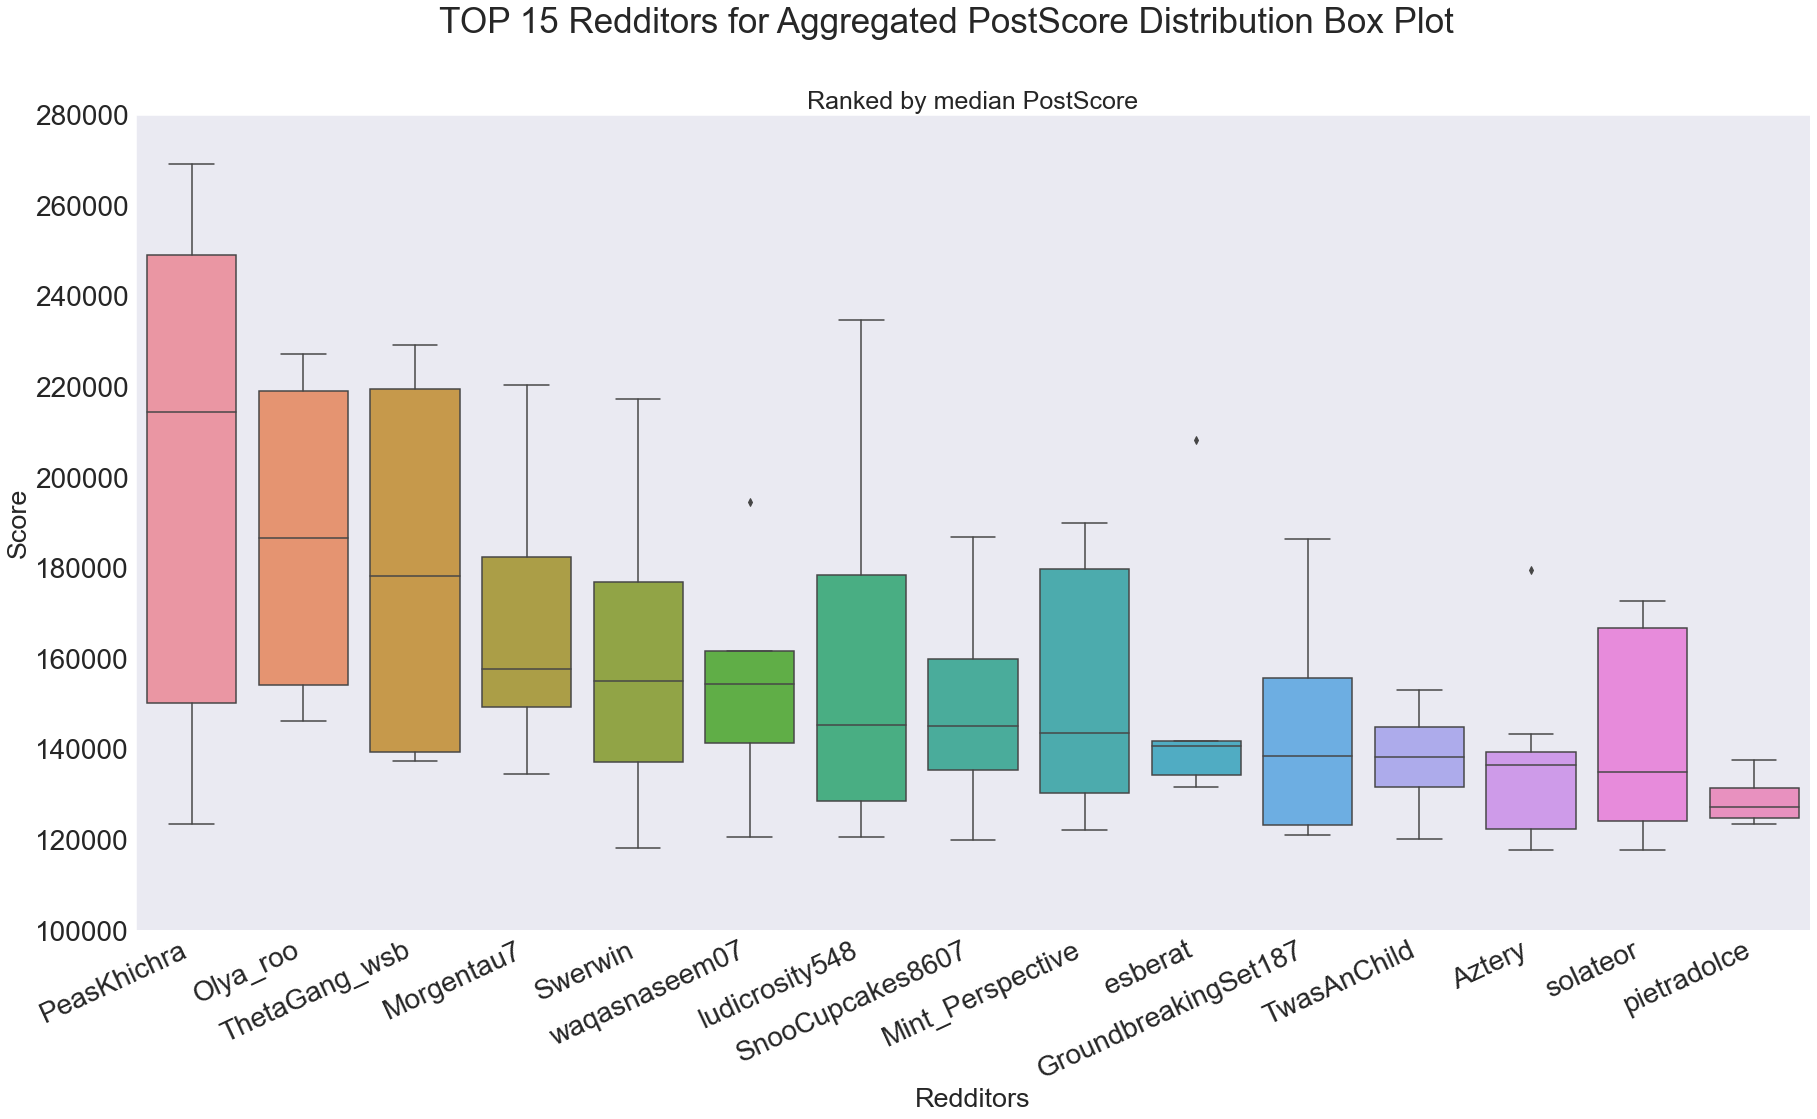

In [491]:
fig = plt.figure(figsize=(30,15))
ax = sns.boxplot(data = top_score_df, x='Redditor', y='PostScore', order=order.Redditor)
labels = ax.get_xticklabels()
label_text = [labels[i].get_text() for i in range(len(labels)) ]
plt.xticks(ax.get_xticks(), labels=label_text,fontsize=28,rotation=25, horizontalalignment='right')
plt.yticks(ax.get_yticks(), fontsize=28)
plt.xlabel('Redditors', size = 27)
plt.ylabel('Score', size = 27)
plt.suptitle('TOP 15 Redditors for Aggregated PostScore Distribution Box Plot', size = 35)
plt.title('Ranked by median PostScore', size = 25)

plt.show()